In [1]:
# Standard Libraries
import os
import sys

# Add the root directory to sys.path
sys.path.append(os.path.abspath('../..'))

# Importing modules from project
from src.data.make_dataset import create_dataset
from src.models.train_model import train_and_save, train_study_and_save, tune_and_save
from src.visualization.visualize import visualize_study, visualize_evaluate, visualize_train
from src.models.predict_model import evaluate_model, evaluate_model_opt_threshold, predict_model


C:\Users\duyhu\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Create dataset for training, evaluating and tesing**

In [2]:
X_train, X_val, X_test, y_train, y_val, y_test = create_dataset(file_name="processed_data")

2025-03-16 13:27:45,560 - INFO - Loading data: processed_data


**Train the neural network model with custom hyperparameters**

In [3]:
train_and_save(
            model_type="neural_network",
            model_name="neural_network_manual",
            X_train=X_train,
            y_train=y_train,
            X_val=X_val,
            y_val=y_val,
            lr=0.001,
            batch_size=32,
            epochs=100,
            hidden_size=15,
        )

Training neural_network with the following hyperparameters:
lr: 0.001
batch_size: 32
epochs: 100
hidden_size: 15


2025-03-16 13:27:49,695 - INFO - Epoch [10/100], Train Loss: 0.4143, Validation Loss: 0.4307
2025-03-16 13:27:51,749 - INFO - Epoch [20/100], Train Loss: 0.4054, Validation Loss: 0.4334
2025-03-16 13:27:53,791 - INFO - Epoch [30/100], Train Loss: 0.3995, Validation Loss: 0.4376
2025-03-16 13:27:55,845 - INFO - Epoch [40/100], Train Loss: 0.3974, Validation Loss: 0.4369
2025-03-16 13:27:57,891 - INFO - Epoch [50/100], Train Loss: 0.3944, Validation Loss: 0.4367
2025-03-16 13:27:59,951 - INFO - Epoch [60/100], Train Loss: 0.3926, Validation Loss: 0.4397
2025-03-16 13:28:01,935 - INFO - Epoch [70/100], Train Loss: 0.3901, Validation Loss: 0.4377
2025-03-16 13:28:03,977 - INFO - Epoch [80/100], Train Loss: 0.3876, Validation Loss: 0.4428
2025-03-16 13:28:06,044 - INFO - Epoch [90/100], Train Loss: 0.3872, Validation Loss: 0.4399
2025-03-16 13:28:08,057 - INFO - Epoch [100/100], Train Loss: 0.3844, Validation Loss: 0.4416
2025-03-16 13:28:08,062 - INFO - Training results saved to c:\Users\d

2025-03-16 13:28:08,073 - INFO - Loading training results from file: ne_neural_network_manual
2025-03-16 13:28:08,073 - INFO - Training ne_neural_network_manual loaded successfully.
2025-03-16 13:28:08,087 - INFO - Plotting loss curves.


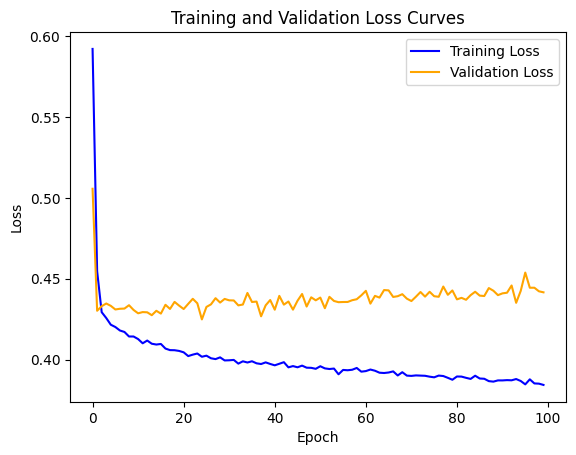

In [4]:
visualize_train(file_name="ne_neural_network_manual")

**Evaluate the custom model using custom threshold**

In [5]:
evaluate_model(file_name="ne_neural_network_study", X_test=X_test, y_test=y_test, threshold=0.5)

2025-03-16 13:28:08,312 - INFO - Model ne_neural_network_study loaded successfully.
2025-03-16 13:28:08,326 - INFO - Accuracy: 0.7868
2025-03-16 13:28:08,327 - INFO - Precision: 0.6131
2025-03-16 13:28:08,327 - INFO - Recall: 0.4641
2025-03-16 13:28:08,328 - INFO - F1: 0.5283
2025-03-16 13:28:08,330 - INFO - Roc_auc: 0.7880
2025-03-16 13:28:08,332 - INFO - Evaluation results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\evaluations\ne_neural_network_study.pkl.


2025-03-16 13:28:08,341 - INFO - Loading evaluation results from file: ne_neural_network_study
2025-03-16 13:28:08,341 - INFO - Evaluation ne_neural_network_study loaded successfully.
2025-03-16 13:28:08,355 - INFO - Plotting confusion matrix.


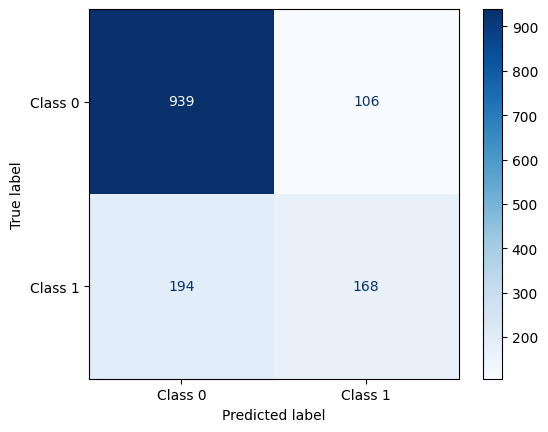

2025-03-16 13:28:08,493 - INFO - Plotting ROC curve and AUC score.


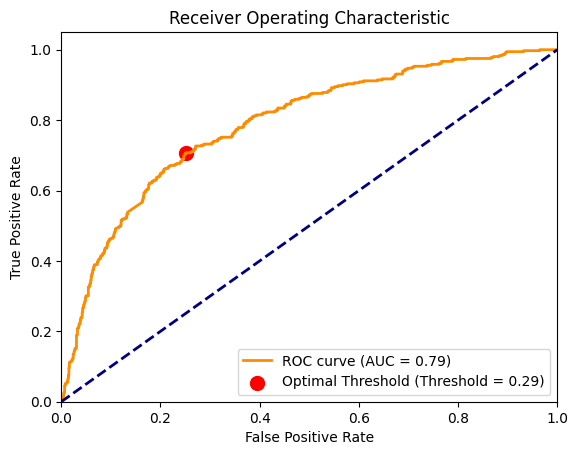

2025-03-16 13:28:08,614 - INFO - Plotting Precision-Recall curve.


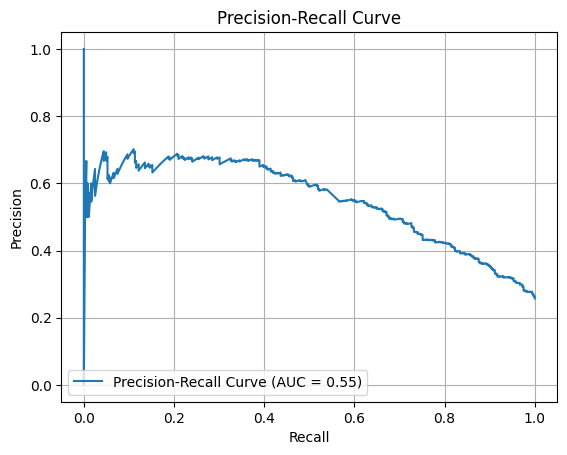

In [6]:
visualize_evaluate(file_name="ne_neural_network_study")

**Optimize the model and save the optimal hyperparameters study**

In [7]:
tune_and_save(
        model_type="neural_network",
        model_name="neural_network_study",
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        n_trials=100,
        direction="minimize",
    )

[I 2025-03-16 13:28:08,728] A new study created in memory with name: no-name-01aa52cd-bb8c-48cf-87ea-607febba8568
[I 2025-03-16 13:28:19,577] Trial 0 finished with value: 5.4213007111703195 and parameters: {'lr': 0.037460266483547784, 'batch_size': 124, 'hidden_size': 190, 'epochs': 124}. Best is trial 0 with value: 5.4213007111703195.
[I 2025-03-16 13:28:51,313] Trial 1 finished with value: 57.83821745702198 and parameters: {'lr': 0.01561030385783923, 'batch_size': 47, 'hidden_size': 22, 'epochs': 175}. Best is trial 0 with value: 5.4213007111703195.
[I 2025-03-16 13:29:09,911] Trial 2 finished with value: 8.412174832133147 and parameters: {'lr': 0.06011549002420346, 'batch_size': 100, 'hidden_size': 13, 'epochs': 195}. Best is trial 0 with value: 5.4213007111703195.
[I 2025-03-16 13:29:16,318] Trial 3 finished with value: 12.255005570252736 and parameters: {'lr': 0.08324593965363418, 'batch_size': 52, 'hidden_size': 53, 'epochs': 45}. Best is trial 0 with value: 5.4213007111703195.
[

2025-03-16 13:54:04,851 - INFO - Loading Optuna study from file: ne_neural_network_study
2025-03-16 13:54:04,852 - INFO - Study ne_neural_network_study loaded successfully.
2025-03-16 13:54:04,878 - INFO - Plotting optimization history for study.
c:\Users\duyhu\Downloads\ML_Beginners\src\visualization\visualize.py:42: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_optimization_history(study)


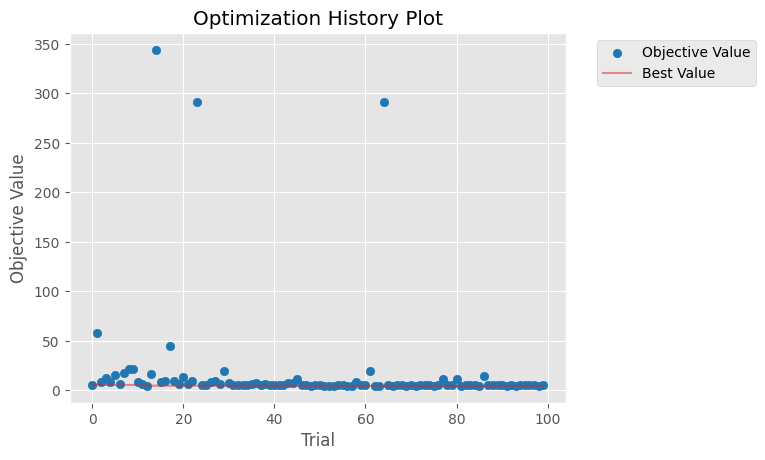

2025-03-16 13:54:05,386 - INFO - Plotting slice plot for study.
c:\Users\duyhu\Downloads\ML_Beginners\src\visualization\visualize.py:56: ExperimentalWarning: plot_slice is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_slice(study)


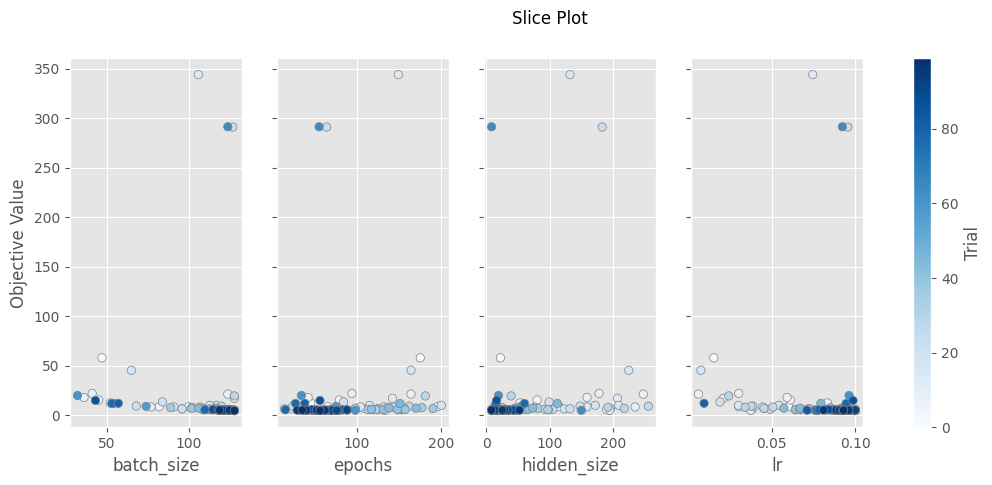

2025-03-16 13:54:05,693 - INFO - Plotting parameter importance for study.
c:\Users\duyhu\Downloads\ML_Beginners\src\visualization\visualize.py:70: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  fig = optuna.visualization.matplotlib.plot_param_importances(study)


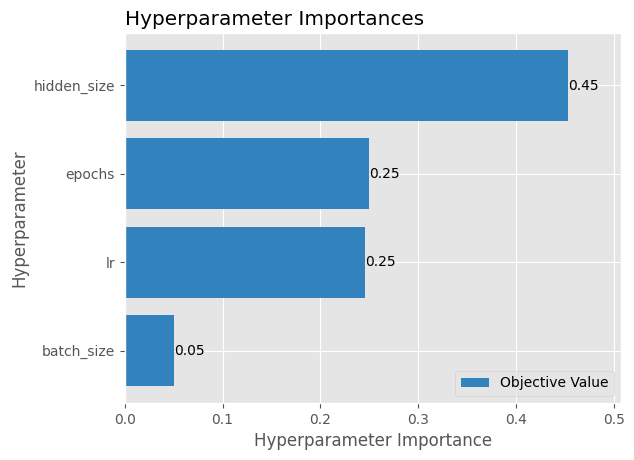

In [8]:
visualize_study("ne_neural_network_study")

**Train the neural network model using the optimal hyperparameters**

In [9]:
train_study_and_save(
            model_type="neural_network",
            model_name="neural_network_study",
            X_train=X_train,
            y_train=y_train,
            X_val=X_val,
            y_val=y_val,
            file_name="ne_neural_network_study",
        )

2025-03-16 13:54:06,880 - INFO - Study ne_neural_network_study loaded successfully.


Training neural_network with the following hyperparameters:
lr: 0.09986865141128451
batch_size: 128
hidden_size: 17
epochs: 69


2025-03-16 13:54:07,726 - INFO - Epoch [10/69], Train Loss: 0.4212, Validation Loss: 0.4341
2025-03-16 13:54:08,528 - INFO - Epoch [20/69], Train Loss: 0.4118, Validation Loss: 0.4508
2025-03-16 13:54:09,350 - INFO - Epoch [30/69], Train Loss: 0.4097, Validation Loss: 0.4692
2025-03-16 13:54:10,150 - INFO - Epoch [40/69], Train Loss: 0.4047, Validation Loss: 0.4767
2025-03-16 13:54:10,942 - INFO - Epoch [50/69], Train Loss: 0.3940, Validation Loss: 0.5060
2025-03-16 13:54:11,732 - INFO - Epoch [60/69], Train Loss: 0.4065, Validation Loss: 0.5042
2025-03-16 13:54:12,444 - INFO - Training results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\trainings\ne_neural_network_study.pkl.
2025-03-16 13:54:12,449 - INFO - Model saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\models\experiments\ne_neural_network_study.pth


2025-03-16 13:54:12,457 - INFO - Loading training results from file: ne_neural_network_study
2025-03-16 13:54:12,457 - INFO - Training ne_neural_network_study loaded successfully.
2025-03-16 13:54:12,470 - INFO - Plotting loss curves.


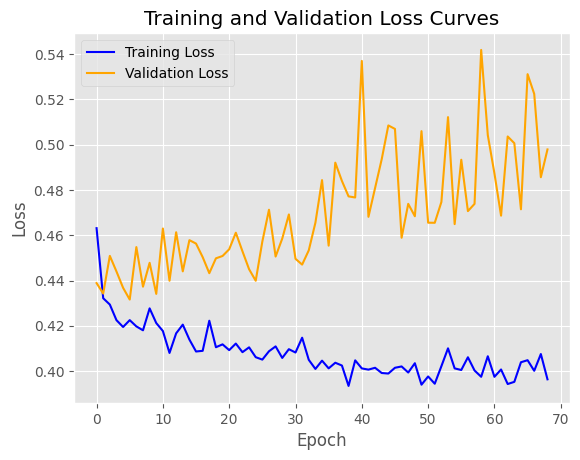

In [10]:
visualize_train("ne_neural_network_study")

**Evaluate optimal the model using custom threshold**

In [11]:
evaluate_model(file_name="ne_neural_network_study", X_test=X_test, y_test=y_test, threshold=0.5)

2025-03-16 13:54:12,627 - INFO - Model ne_neural_network_study loaded successfully.
2025-03-16 13:54:12,644 - INFO - Accuracy: 0.7960
2025-03-16 13:54:12,644 - INFO - Precision: 0.6494
2025-03-16 13:54:12,644 - INFO - Recall: 0.4503
2025-03-16 13:54:12,649 - INFO - F1: 0.5318
2025-03-16 13:54:12,649 - INFO - Roc_auc: 0.8255
2025-03-16 13:54:12,650 - INFO - Evaluation results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\evaluations\ne_neural_network_study.pkl.


2025-03-16 13:54:12,659 - INFO - Loading evaluation results from file: ne_neural_network_study
2025-03-16 13:54:12,660 - INFO - Evaluation ne_neural_network_study loaded successfully.
2025-03-16 13:54:12,669 - INFO - Plotting confusion matrix.


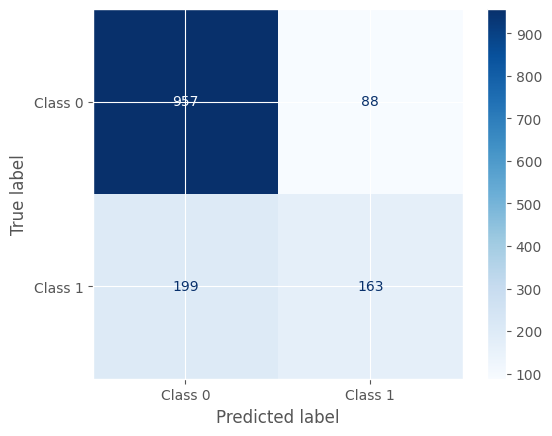

2025-03-16 13:54:12,801 - INFO - Plotting ROC curve and AUC score.


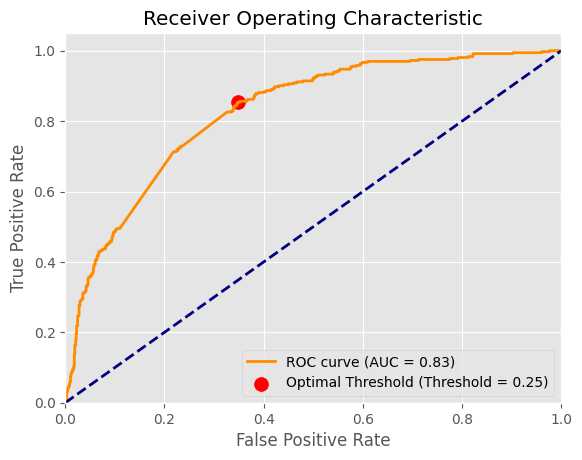

2025-03-16 13:54:12,933 - INFO - Plotting Precision-Recall curve.


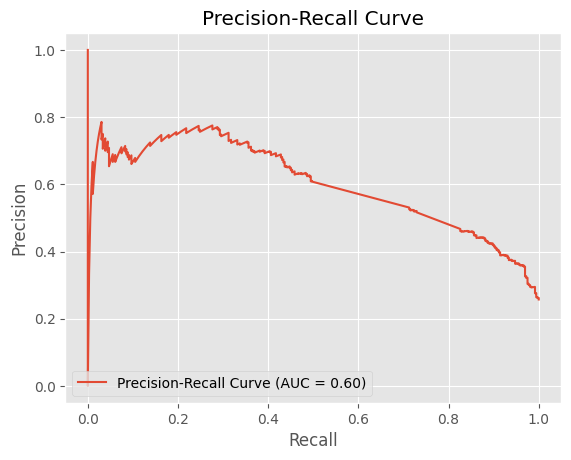

In [12]:
visualize_evaluate("ne_neural_network_study")

**Evaluate the model using the optimal threshold**

In [13]:
evaluate_model_opt_threshold(file_name="ne_neural_network_study", X_test=X_test, y_test=y_test)

2025-03-16 13:54:13,214 - INFO - Model ne_neural_network_study loaded successfully.
2025-03-16 13:54:13,219 - INFO - Optimal Threshold (Maximizing Youden's J): 0.2510
2025-03-16 13:54:13,229 - INFO - Accuracy: 0.7036
2025-03-16 13:54:13,230 - INFO - Precision: 0.4590
2025-03-16 13:54:13,230 - INFO - Recall: 0.8508
2025-03-16 13:54:13,232 - INFO - F1: 0.5963
2025-03-16 13:54:13,232 - INFO - Roc_auc: 0.8255
2025-03-16 13:54:13,235 - INFO - Evaluation results saved to c:\Users\duyhu\Downloads\ML_Beginners\src\..\storage\evaluations\ne_neural_network_study.pkl.


2025-03-16 13:54:13,242 - INFO - Loading evaluation results from file: ne_neural_network_study
2025-03-16 13:54:13,244 - INFO - Evaluation ne_neural_network_study loaded successfully.
2025-03-16 13:54:13,256 - INFO - Plotting confusion matrix.


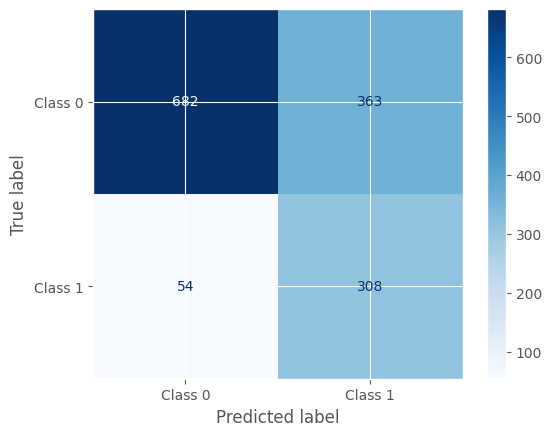

2025-03-16 13:54:13,365 - INFO - Plotting ROC curve and AUC score.


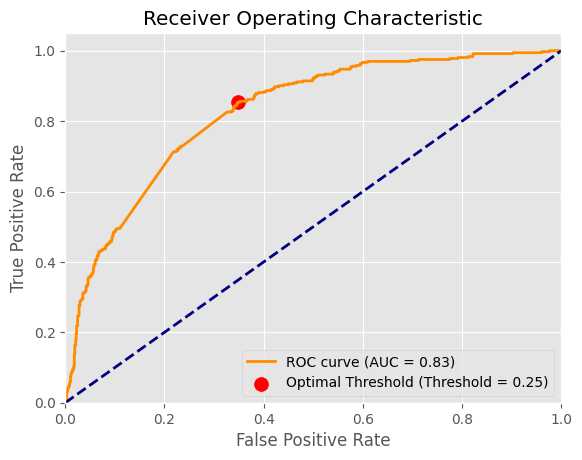

2025-03-16 13:54:13,488 - INFO - Plotting Precision-Recall curve.


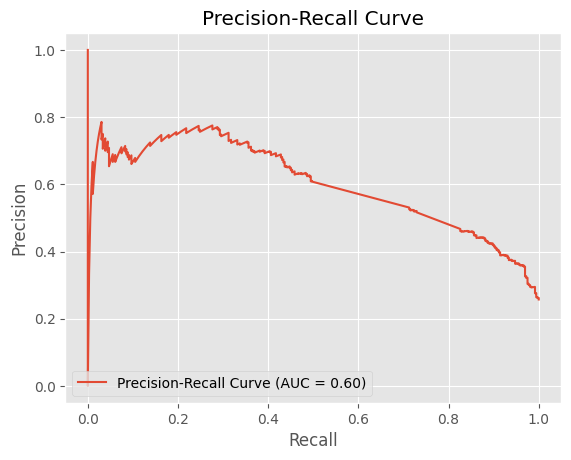

In [14]:
visualize_evaluate("ne_neural_network_study")